# Python Machine Learning 3

# Logistic Regression

## *By Sal Lascano*

Logistoic regression is a linear model for classification, not a regression despitre its name. In classification, given a feature or sets of features, we want to predict cathegorical outputs. For example:<br>
- Tumor (Malignant, benign)<br>
- Blood Type (A, B, AB, O)

The idea of Logistic Regression is to transform our linear function $\beta_0 + \beta_1X$ using the sigmoid function, so that no matter what values $\beta_0 + \beta_1X$ have, the outcome will always be between 0 and 1. 

Before we dive into Logistic regression, there are a few things we need to familiarize with. Lets start with an example. Load the data set of size of tumors and if the are malignant or not. In this data set 0 represents non malignant and 1 represents malignant. 

# Need Assumptions!!!!!!!!!!!


In [20]:
# We need Pandas to bring in the data lets import it
import pandas as pd

# the csv file is in desktop so below is the path
path_to_file = "pml2tumor.csv"

# Now we create a variable which will have our data
data = pd.read_csv(path_to_file)

# lets see how big our data is 
print(data.shape) # not so big but that will do for now

# now lets see the actual data
data

(12, 2)


,Size,Malignant
0,3.788628,0
1,2.436510,0
2,2.096497,0
3,0.136507,0
4,1.722612,0
5,1.645241,0
6,4.917259,1
7,4.372999,1
8,4.956182,1
9,4.522782,1


Lets visualize our data, to have a better idea of what we are dealing with

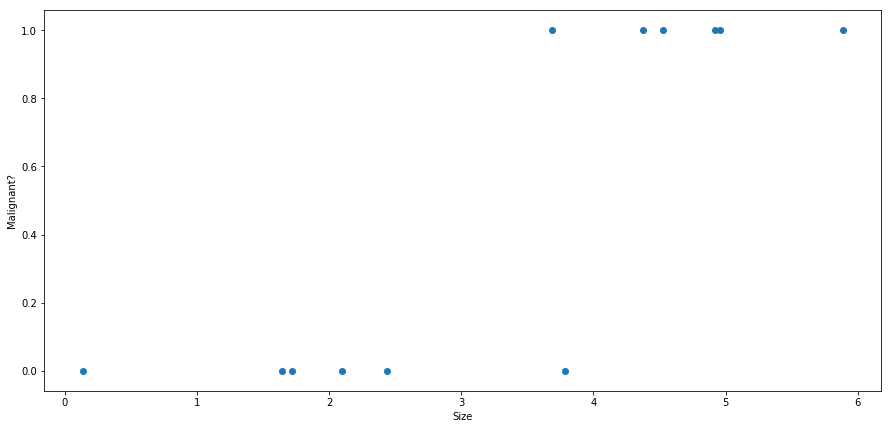

In [22]:
# Import all of out necesary packages
%matplotlib inline
import matplotlib.pyplot as plt

# Set the size of the graph
plt.figure(figsize=(15, 7))

# Assign our X and Y axis
plt.scatter(data['Size'], data['Malignant'])

# Add labels
plt.ylabel('Malignant?')
plt.xlabel('Size')

#Show me the plot
plt.show()

The first thing that comes to my mind is that this violates a very important assumption of Linear Regression, Lineariry. With no linearity it would be silly to try and use a line to model the relationship of these two variables. 

### Sigmoid Function

A Sigmoid function is a mathematical function which has the caracteristics of a sogmoid curve or S shape. it is defined by the formula:<br>

$$
S(t)=\frac{e^t}{1+e^t}=\frac{1}{1+e^{-t}}
$$

The Sigmoid function has a finite limit of 0 as X approaches negative infinity and 1 as X aproaches possitive infinity. It is a monotonically smooth increassing function which bounds any value to a value bounded between 0 and 1. 

Lets plot a sigmoid function.

In [47]:
import math
import numpy as np 
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1 + math.exp(-item)))
    return a

In [48]:
x = np.arange(-10., 10., 0.2)
print(np.round(x,decimals=1))
y = sigmoid(x)

[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2  -0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.
   9.2   9.4   9.6   9.8]


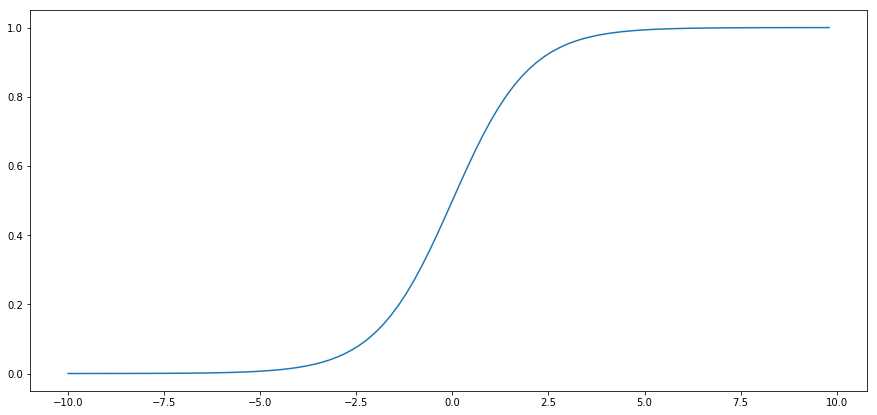

In [49]:
# Set the size of the graph
plt.figure(figsize=(15, 7))

plt.plot(x, y)
plt.show()


### Eulers number

Euler's number is one of the most famous and important mathematical constants. 

$$
e = 2.7182...
$$

Euler's number is a. mathematical constant that is related to growth and rate of change. 

But why is Euler's number related to change? Lets look at the original problem where $e$ was first used:

Going back to the 17th century Jacob Bernulli was interested in compound interest. Lets say that you have one dollar in your bank

**\$1**


This is a very generous bank, they offer you 100% intrest every year so 12 months from now you will have two dollars


**\$1 ---> \$2**


What if they offer you 50% interest every six months, is that better or worse? So we start with one dollar, 50% of that is \$.50 so after six months you have $1.50. 50% of \$1.50 is \$75 so by the 12th month you have $2.25


**\$1 ---> \$1.50 ---> \$2.25 (it is better)**



So what happens if we do this more regularly? what happens if we do it every month? The bank is offering you 1/12 interest every month, is that better? the formula to solve this is the fallowing
$$
(1 + \frac{1}{n})^n
$$

In this case $n$ is equal to 12, one for every month


$$
(1 + \frac{1}{12})^{12} = 2.61
$$


It is a lot better, what about if we do it every week? 


$$
(1 + \frac{1}{52})^{52} = 2.69
$$


It gets better, what about every day?


$$
(1 + \frac{1}{365})^{365} = 2.71
$$

We see that it gets better and better the more frequent we do it, Now what about if we did it continiously? every instamce, continious intrest as n goes to infinity. Bernulli did not accomplished to figure out this number even though he knew it was between 2 and 3. Euler worked out this number some time after Bernulli proposed it. 


$$
e = 2.7182...
$$

## Logistic Regression

As mentioned before, the idea is to transform our $\beta_0 + \beta_1X$ usinf the sigmoid function so that no matter what values our $\beta_0 + \beta_1X$ have, they will be bounded to be between 0 and 1. Logistic regression uses the equation below to estimate the probability that $y = 1$ given $X$.
<br>
<br>
$$
Pr(Y=1|X=x)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}
$$

Lets use the Likelihood function $p(x_i,\beta_0,\beta_1)=Pr(Y=1|X=x_i)$ to represent the probability that $y = 1$ & $y = 0$ given $X$ where x is our independent variable. The funtion below gives the probability of the labels where the first part is the probability that $y = 1$ and the second part is the probability that $y = 0$.
<br>
<br>
$$
L(\beta_0, \beta_1) = \prod_{i, y_i=1}p(x_i, \beta_0, \beta_1)\prod_{i, y_i=0}(1-p(x_i, \beta_0, \beta_1))
$$

Technically, in a sample size n, the Likely function takes a form of a product. It is more convinient to work with the logarithm of the likelihood function, called the **Log-Likelihood** so that we are able to write it as the log of individually log terms and not the overall product. 

$$
\begin{align}
\log{L(\beta_0,\beta_1)} = \sum_{i=1}^{n}\{y_i(\beta_0+\beta_1X)-\log(1+e^{\beta_0+\beta_1X})\}
\end{align}
$$

To maximize the Log-Likelihood, most packages use the Gradiant descent or a variant of it to find the steepest path to the on the graph to the Log-Likelihood function. 

After estimating the parameters, the likelihood function will express the probability that $Y$ = 0 given $X$. If we set a threshhold on the probability then we can get a binary outcome. 

## Logistic Regression using Scikit-Learn 

Finally it is time to play aroud with what we learned. Lets get coding.

In [4]:
#Lets Import all of out necesary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Import the data
data = pd.read_csv("pml2tumor.csv")

#Get our X values from the data, the size of the tumor which is the independent variable.
#We will get is with double square brakets so its assigned to x as a Pandas data frame. 
x = data[["Size"]]

#Get our Y values from the data, the boolean of weather the tumor is malignant or not, our dependent variable.
#We will get is with single square brakets so its assigned to y as a Pandas series.
y = data["Malignant"]

In [5]:
#Lets import linear model from sklearn, and assign LogisticRegression to logit 
from sklearn import linear_model
logit = linear_model.LogisticRegression()

#We can explore the parameters of logistic regression using the get_params() method
logit.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [6]:
#NOW, lets fit the model, note we are not regularizing as that we will discuss later on hence lets set the
#parametes with a large number
logit.set_params(C=1e4)
logit.fit(x, y)

#Lets print our betas
print('Beta_0 = %f' %logit.intercept_)
print('Beta_1 = %f' %logit.coef_)

Beta_0 = -16.679291
Beta_1 = 4.504224


In [7]:
#Note that we can evaluate the model using the score method. Very similar to R^2 in linear regression
print(logit.score(x, y))

0.8333333333333334


Now that we model is ready we can start using it make predictions using the predict method and see the probability of a variable to be in one or another class by using the predict_proba method

In [8]:
#Lets predict the outcome of the fallowing independent variables
logit.predict([[10], [2], [3.70], [3.71], [11]])

#Note something interesting, the model has set 3.70 as the threshold

array([1, 0, 0, 1, 1])

In [9]:
#lets see the probability of a tumor size 4
logit.predict_proba([[4]])

array([[0.20790427, 0.79209573]])

According to our model, a tumor size 4 has 20.7% chance of being benign and 79.3% of being malignant

Lets use the logistic_model_1Dplot() function to visulize the prediction made by opur model

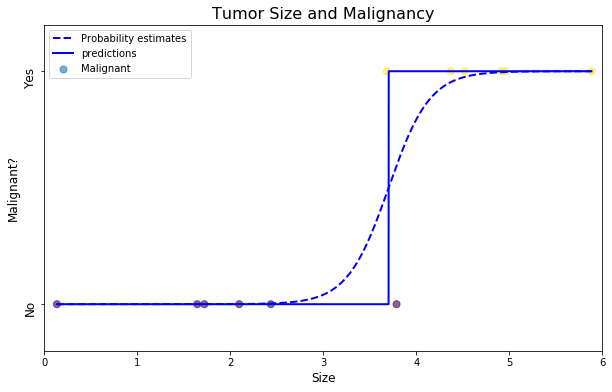

In [25]:
#import the needed packages
from PlottingFunction import data_1Dplot, logistic_model_1Dplot
#IMPORTANT, make sure the PlottingFunction.py file is in the same filder as the notebook***

## Plot the data points
plt.figure(figsize=(10, 6))

#Note we are using Pandas iloc indexer to change our x from dataframe to a series, required by this function
data_1Dplot(x.iloc[:,0], y, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")

# Plot logistic model with original dataset
logistic_model_1Dplot(x, logit)

# Set plot range
plt.axis([0,6,-0.2,1.2])

# Legend top-left corner
plt.legend(loc=2)

#Show the graph
plt.show()

## Multivariable Logistic regression

Very similar to Multiple Linear regression, for Multivariable Logistic Regression we are going to need the help of linear algebra and its matrix notation since we will be dealing with more than one independent variable. The matrix notation for Multivariable Logistic Regression can be written as fallows:

$$Pr(Y=1|\mathbf{X})=\frac{e^{\mathbf{X}\beta}}{1+e^{\mathbf{X}\beta}}$$

If you go back to Python Machine Learning 2, you can see in detail how we went from:

$$y_i = \beta_0 + \beta_ix_i$$ 

to:

$$\hat{Y}=\hat{\beta}_0+\sum_{i=1}^p\hat{\beta}_iX_i$$ 

and ended with:

$$Y=X\beta$$

Lets work on an example. Lets say that a school requires students to take 2 admision test in order to evauate them and decide if they get in or not. we have a data set that can help us with that. Lets work on this project.

In [29]:
#Load the data
data_admin = pd.read_csv('pml2admission.csv')

#see a glimpse of the data 
data_admin.head()

,Decision,Test_1,Test_2
0,1,81.0,85.0
1,0,71.0,85.0
2,1,80.0,90.0
3,0,79.0,84.0
4,0,72.0,94.0


In [30]:
#Lets assign both columns of thest scores to our scores variable and the outcome to decision
scores = data_admin[["Test_1", "Test_2"]]
decision = data_admin["Decision"]

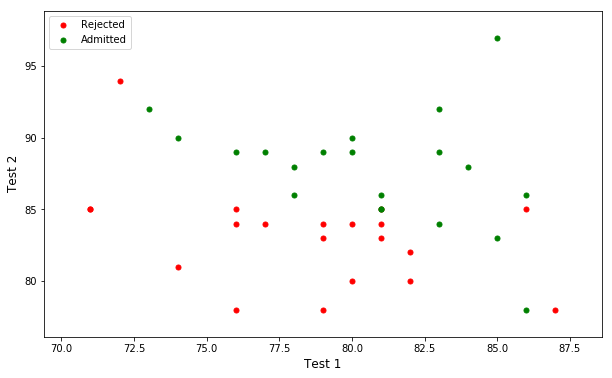

In [32]:
#Import our functions, remember to have the file PlottingFunction.py in the same folder
from PlottingFunction import data_2Dplot, logistic_model_2Dplot, plotModel

# Plotting our data points
plt.figure(figsize=(10, 6))
data_2Dplot(scores, decision, \
              legends=["Rejected", "Admitted"], \
              xlabel="Test 1", ylabel="Test 2")
#show the graph
plt.show()

In [33]:
#again since we are not going to regularize lets set our parameter to a high number
decision_logit = linear_model.LogisticRegression(C=1e4)

# Fit the model
decision_logit.fit(scores, decision)

# Get the score (accuracy for classification problems)
decision_logit.score(scores, decision)

0.875

In [43]:
#Print our betas
print('Beta_0 = %f' %decision_logit.intercept_)
print('Beta_1, Beta_2 = below')
print(decision_logit.coef_)

Beta_0 = -81.401619
Beta_1, Beta_2 = below
[[0.41017514 0.57132359]]


In [50]:
#lets predict a student who scored 40 and 59 in their test asn another who scored 80 and 86
print(decision_logit.predict([[40, 59]]))
print(decision_logit.predict([[80, 86]]))

#0 represents not accepted and 1 represents accepted. Going by the grades, the outcome makes absoluse sence

[0]
[1]


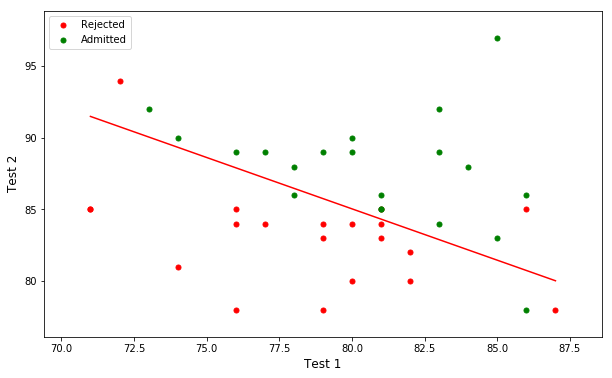

In [51]:
#Lets plot the outcome of the model with out data points 
plt.figure(figsize=(10, 6))
data_2Dplot(scores, decision, \
            legends=["Rejected", "Admitted"], \
            xlabel="Test 1", ylabel="Test 2")

# Plot decision boundary
logistic_model_2Dplot(scores, decision_logit)

#see the plot
plt.show()

## Logistic regression with more than two classes

### One-vs-all

When a problem has more than two classes, Logistic Regression uses an algorithm called one-vs-all classification. The way it works is that for example given a, b and c classes in the training set, it turns it into 3 different binary classification problems as fallows:

Class a = $H_\theta^{(a)}(x)$ --> class a vs. class b & c

Class b = $H_\theta^{(b)}(x)$ --> class b vs. class a & c

Class c = $H_\theta^{(c)}(x)$ --> class c vs. class b & a

So to sumarize, what we have done is to fit $i$ number classifiers on the probability that $y = i$ while $x = \theta$ as fallows:

$H_\theta^{(i)}(x)=P(y = i|x = \theta)$ ($i$=a, b ,c)

Lets work on an example to see better how it works. 

In [100]:
#we will be using a dataset that is build in sklearn so lets import our iris data set
from sklearn import datasets
iris = datasets.load_iris()

#for this exercise we will be using only the petal lenth and the petal width, the 3rd and 4th feaures of
#the iris data set and assign them as the independent variables and the target as the dependent variable
iris_x = iris.data[:,(1,2)]
iris_y = iris.target

In [101]:
#again since we are not going to regularize lets set our parameter to a high number
iris_logit = linear_model.LogisticRegression(C=1e4)
# Lets fir the model
iris_logit.fit(iris_x, iris_y)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [102]:
#Now lets see how accurate our model is using the score method
print(iris_logit.score(iris_x, iris_y))

0.9533333333333334


In [104]:
# Lets get our Intercept
print('Intercept')
print(iris_logit.intercept_)
print('*'*50)

#Now our Coeficients
print('Coeficients')
print(iris_logit.coef_)

Intercept
[  1.73622519   8.486567   -36.55389592]
**************************************************
Coeficients
[[ 6.97804805 -8.49191021]
 [-3.15459097  0.04791412]
 [-2.5269779   9.00528527]]


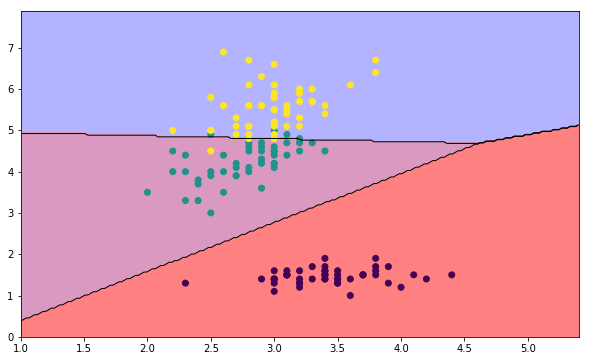

In [105]:
#Lets plot our model
plt.figure(figsize=(10, 6))
plotModel(iris_logit, iris_x[:, 0], iris_x[:, 1], label=iris_y)
plt.show()